## Задание №1

> В специальной лотерее игрок выбирает 5 разных чисел из возможных 30. В этот же день случайным образом определяется победная комбинация из 7 разных чисел (из того же набора). Игрок считается победителем в случае, если совпадают любые 4 числа в выбранном им наборе и в победной комбинации.
>

**Какова вероятность выигрыша?**

In [1]:
N = 30
M = 7

n = 5
k = 4

**Сочетания равны:**

In [2]:
import math
C_k_M = math.factorial(7)/(math.factorial(4)*math.factorial(7-4))

C_N_M = math.factorial(30-7)/(math.factorial(1)*math.factorial(30-7-1))

C_n_N = math.factorial(30)/(math.factorial(5)*math.factorial(30-5))

**Вероятность равна:**

In [3]:
P = C_k_M * C_N_M / C_n_N

print(P)

0.005648884959229787


## Задание №2

> В файле "Lightmap. Тестовое задание №2.csv" построчно приведены записи событий установки приложения (install) и начала сессии (login). В столбце player_id указан уникальный id пользователя, в столбце event_timestamp - время события (unix timestamp UTC). 

> Удержание первого дня определяется как доля уникальных пользователей, отправивших событие login на следующий *календарный* день, среди всех пользователей, отправивших событие install в текущий *календарный* день. Например, если 1 сентября 100 пользователей скачали приложение, и 50 *из них* совершили логин 2 сентября, удержание первого дня для 1 сентября составляет 50%.

> Удержание первого дня для периода дат определяется как отношение общего числа уникальных пользователей, вернувшихся в приложение на следующий день после дня установки, к общему числу уникальных пользователей, совершивших установку в рамках заданного периода дат.


> Например, если 2 сентября 200 пользователей скачали приложение, и 75 из них совершили логин 3 сентября, удержание первого дня за период 1-2 сентября составляет: (50 + 75) / (100 + 200) ≈ 42%

**Можно ли с уверенностью утверждать, что удержание первого дня за период с 15 по 18 сентября выше, чем удержание первого дня за период с 19 по 22 сентября? И почему?**

In [4]:
import pandas as pd

In [5]:
# Загрузим данные Lightmap. Тестовое задание №2.csv
data = pd.read_csv('Lightmap. Тестовое задание №2.csv')
data.shape

(52543, 3)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52543 entries, 0 to 52542
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   player_id        52543 non-null  int64 
 1   event_timestamp  52543 non-null  int64 
 2   event_name       52543 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.2+ MB


In [7]:
# Переведём unix timestamp UTC в дату
data['date'] = pd.to_datetime(data["event_timestamp"],unit='s')

In [8]:
# Отсортируем данные по времени и дате
data = data.sort_values(by='date')

In [9]:
# Удалим пользователей, у которых мы не знаем дату установки
dic =[]
for i in data['player_id']:
    if data[data.player_id ==i].event_name.iloc[0] == 'install':
        dic.append(i)

 
for i in data['player_id']:   
    if i not in dic:
        data.drop(data[data.player_id == i].index, inplace=True)

In [10]:
# Произведём подсчет воличества встречающихся нам id
data['player_id_count'] = data.groupby('player_id').cumcount()+1

In [11]:
# Удалим пользователей, которые регестрируются больше одного раза
for i in data['player_id_count']:   
    if i > 2:
        data.drop(data[data.player_id_count == i].index, inplace=True)

In [12]:
# Сгенерируем новые признаки
data2 = pd.get_dummies(data['event_name'])
data2 = pd.concat([data, data2], axis=1)

In [13]:
# Сортируем по дате
data2 = data2.sort_values(by='date')

In [14]:
# Убираем время в дате
data2 = data2.assign(date = lambda x: pd.to_datetime(x['date'].dt.strftime('%Y-%m-%d')))

In [36]:
# Убираем пользователей, которые установили приложение и зарегистрировались в этот же день
data_date_id = data2[['date','player_id']]
data_duplicates = data_date_id[data_date_id.duplicated()]

for ids in data2['player_id']:   
    if ids in data_duplicates['player_id'].values:
        data2.drop(data2[data2.player_id == ids].index, inplace=True)

In [37]:
data2

,player_id,event_timestamp,event_name,date,player_id_count,install,login
49928,1047198,1631664035,install,2021-09-15,1,1,0
1832,1047199,1631664044,install,2021-09-15,1,1,0
51799,1045961,1631664057,install,2021-09-15,1,1,0
3236,1047200,1631664061,install,2021-09-15,1,1,0
853,1047203,1631664085,install,2021-09-15,1,1,0
...,...,...,...,...,...,...,...
51529,1062270,1632441435,install,2021-09-23,1,1,0
9207,1062272,1632441512,install,2021-09-23,1,1,0
13090,1062274,1632441540,install,2021-09-23,1,1,0
5812,1062277,1632441579,install,2021-09-23,1,1,0


In [38]:
# Группируем данные по датам
data3=data2.groupby('date').sum()

In [39]:
# Удаляем лишние признаки
to_drop = ['player_id','event_timestamp','player_id_count']
data3=data3.drop(to_drop,axis=1)

In [41]:
# Составим функцию расчета удержания
def retention(before_date, after_date):
    inst = data3[(data3.index >= before_date) & (data3.index < after_date)].install.sum()
    log = data3[(data3.index > before_date) & (data3.index <= after_date)].login.sum()
    return ((log/inst)*100)

In [46]:
# Удержание первого дня за период с 15 по 18 сентября
print(round(retention('2021-09-15', '2021-09-19'),2),'%')

27.83 %


In [47]:
# Удержание первого дня за период с 19 по 22 сентября
print(round(retention('2021-09-19', '2021-09-23'),2),'%')

26.55 %


**Поскольку разница в результатах не значительна нельзя с уверенностью утверждать, что удержание первого дня за период с 15 по 18 сентября значительно выше, чем удержание первого дня за период с 19 по 22 сентября**

## Задание №3

> В файле "Lightmap. Тестовое задание №3.csv" построчно приведены записи транзакций, совершенных в приложении когортой пользователей. В столбце event_timestamp указано время транзакции (unix timestamp UTC), в столбце registration_timestamp - дата регистрации пользователя, в столбце inapp_size - размер соответствующего платежа (сумма $).
>

**Требуется построить кривую накопительной суммы платежей когорты по дням с момента регистрации (один день - одна точка на кривой). На основании полученных данных построить и отобразить в виде другой кривой на том же графике прогноз значений накопительной суммы для дней жизни с 90 по 180.**

In [48]:
# Загрузим данные Lightmap. Тестовое задание №3.csv
df = pd.read_csv('Lightmap. Тестовое задание №3.csv')
df.shape

(11577, 3)

In [49]:
# Переведём unix timestamp UTC в дату
df['event_date'] = pd.to_datetime(df["event_timestamp"],unit='s')
df['registration_date'] = pd.to_datetime(df["registration_timestamp"],unit='s')

In [50]:
# Отсортируем данные по времени регистрации
df2 = df[['registration_date', 'inapp_size']]
df2 = df2.sort_values(by='registration_date')

In [51]:
# Убираем время в дате
df2 = df2.assign(registration_date = lambda x: pd.to_datetime(x['registration_date'].dt.strftime('%Y-%m-%d')))

In [52]:
# Групируем сумму платежей по дням
df2 = df2.groupby('registration_date').sum()

In [53]:
# Прибавляем к каждому следующему дню платежи предыдущих дней
inapp_sum = []
x = 0
for count in df2['inapp_size']:
    x += count
    inapp_sum.append(x)

df2['inapp_sum'] = inapp_sum

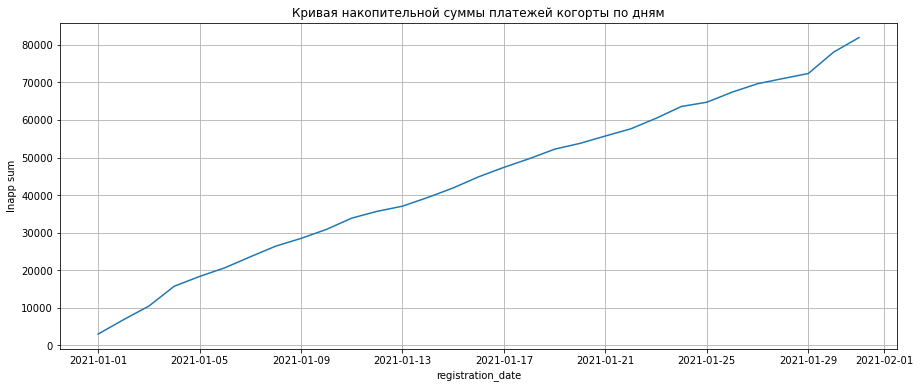

In [54]:
# Построиим кривую накопительной суммы платежей когорты по дням 
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.grid(True)
plt.xlabel('registration_date')
plt.ylabel('Inapp sum')
plt.plot(df2['inapp_sum'])
plt.title('Кривая накопительной суммы платежей когорты по дням')
plt.show()

In [55]:
# Импортируем библиотеки для прогнозирования значений накопительной суммы для дней жизни с 90 по 180.
#pip install pyramid-arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
import numpy as np

In [56]:
# Добавим дополнительние признаки
df3 = pd.DataFrame(np.ones(150), columns=['inapp_sum'])

df3['registration_date'] = pd.date_range('2/1/2021', periods = 150, freq ='d')

df3 = df3.set_index('registration_date')

to_drop = ['inapp_size']
df2 = df2.drop(to_drop,axis=1)

df2 = df2.append(df3)

In [57]:
# Разобьём данные на тренировочную и тестовую выборку
coef_tr_te = 0.175
train_data, test_data = df2.inapp_sum[3:int(len(df2.inapp_sum)*coef_tr_te)], df2.inapp_sum[int(len(df2.inapp_sum)*coef_tr_te):]

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=445.759, Time=0.25 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=446.479, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=444.618, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=443.803, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.562 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   28
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -220.902
Date:                Fri, 22 Oct 2021   AIC                            443.803
Time:                        20:36:55   BIC                            445.061
Sample:                             0   HQIC                           444.166
                                 - 28                                         
Covari

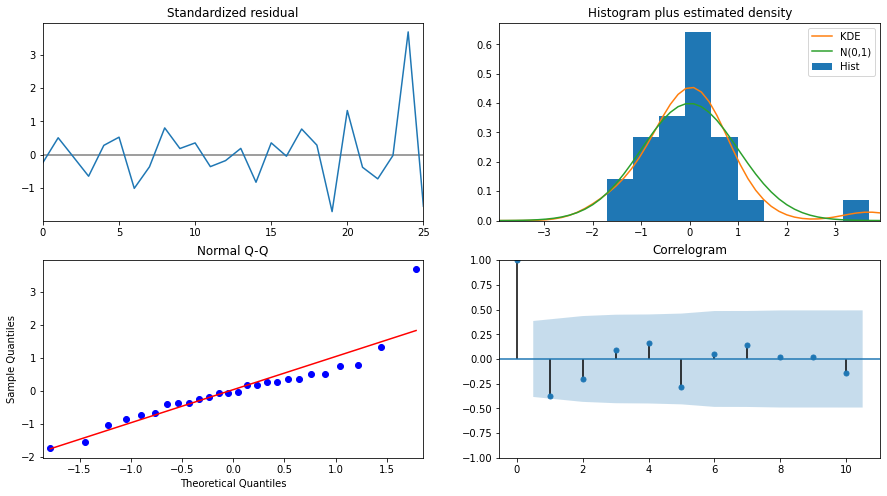

In [58]:
# Подберём параметры для ARIMA
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       
                      max_p=3, max_q=3, 
                      m=1,              
                      d=None,           
                      seasonal=False,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [59]:
# Обучаем модель
model = ARIMA(train_data, order=(0,2,0))  
fitted = model.fit()  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:           D2.inapp_sum   No. Observations:                   26
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -220.880
Method:                           css   S.D. of innovations           1183.733
Date:                Fri, 22 Oct 2021   AIC                            445.759
Time:                        20:36:56   BIC                            448.275
Sample:                    01-06-2021   HQIC                           446.484
                         - 01-31-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.6154    232.149      0.209      0.834    -406.389     503.619


C:\Users\Ruslan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Ruslan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [60]:
fc, se, conf = fitted.forecast(150, alpha=1)

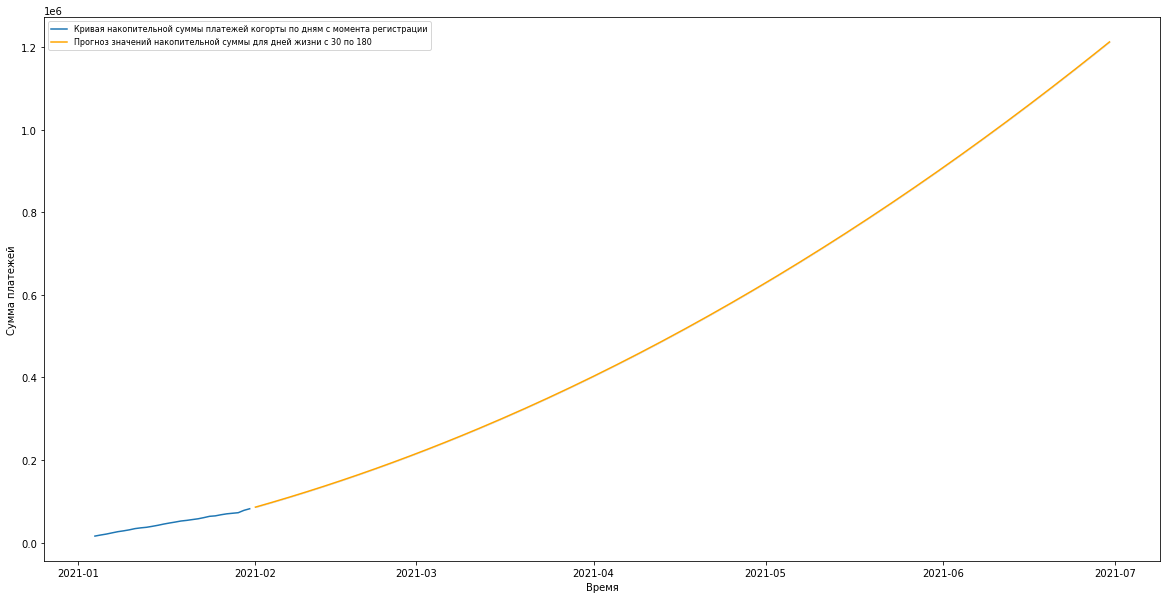

In [61]:
# Построим требуемые кривые на графике

fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(20,10))
plt.plot(train_data, label='Кривая накопительной суммы платежей когорты по дням с момента регистрации')
plt.plot(fc_series, color = 'orange',label='Прогноз значений накопительной суммы для дней жизни с 30 по 180')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.xlabel('Время')
plt.ylabel('Сумма платежей')
plt.legend(loc='upper left', fontsize=8)
plt.show()